In [23]:
import os
import math
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#get data
for i in range(0, 4):
    for j in range (3, 9):
        os.system("./sim 512 "+str(2**j)+" "+str(2**i)+" val_trace_perl1 > out_" + str(2**j)+"_"+str(2**i)+"_perl.txt")
        os.system("./sim 512 "+str(2**j)+" "+str(2**i)+" val_trace_gcc1 > out_" + str(2**j)+"_"+str(2**i)+"_gcc.txt")
print("done")


In [39]:
#parses data

x=[]
yps=[[], [], [], []]
ygs=[[], [], [], []]

for i in range(3, 9):
    x.append(2**i)

#perl
for i in range (0, 4):
    for j in range(3, 9):
        out_fp=open("out_"+str(2**j)+"_"+str(2**i)+"_perl.txt") #open perl files
        for line in out_fp:
            if "IPC" in line:
                str_IPC=line.split("=")[-1]
                str_IPC=str_IPC.replace(" ", "")
                str_IPC=str_IPC.replace("\n", "")
                str_IPC=str_IPC.replace("\t", "")
                yps[i].append(float(str_IPC))
                
                
#gcc
for i in range (0, 4):
    for j in range(3, 9):
        out_fg=open("out_"+str(2**j)+"_"+str(2**i)+"_gcc.txt") #open perl files
        for line in out_fg:
            if "IPC" in line:
                str_IPC=line.split("=")[-1]
                str_IPC=str_IPC.replace(" ", "")
                str_IPC=str_IPC.replace("\n", "")
                str_IPC=str_IPC.replace("\t", "")
                ygs[i].append(float(str_IPC))


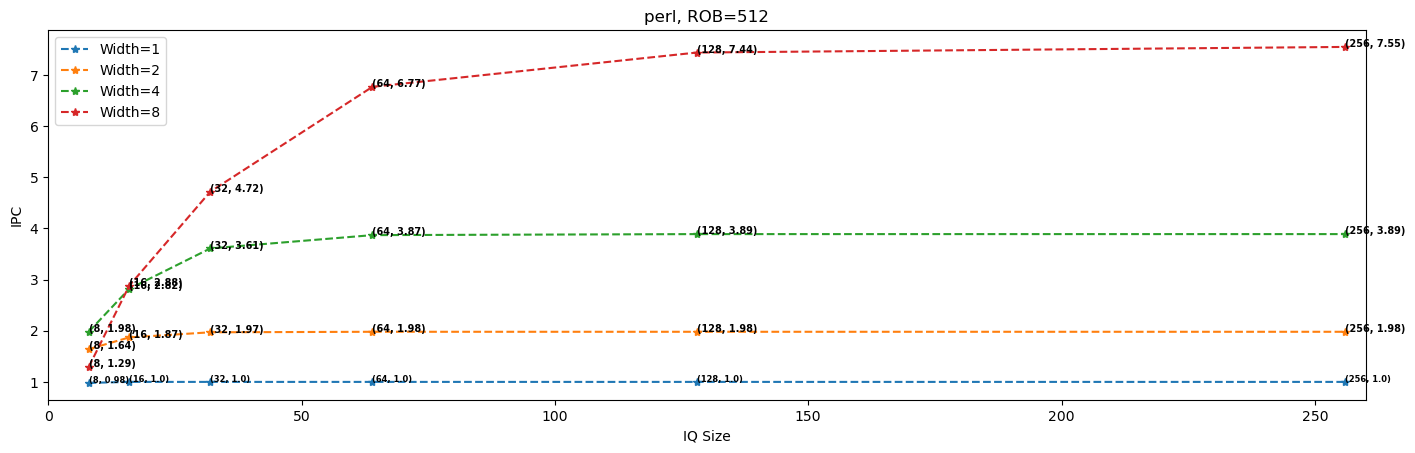

In [109]:
f = plt.figure()
f.set_figwidth(17)
#plot perl graph lines
plt.plot(x, yps[0], label="Width=1", linestyle='--', marker='*')
plt.plot(x, yps[1], label="Width=2", linestyle='--', marker='*')
plt.plot(x, yps[2], label="Width=4", linestyle='--', marker='*')
plt.plot(x, yps[3], label="Width=8", linestyle='--', marker='*')
plt.legend()
plt.xlim([0, 260])
plt.xlabel("IQ Size")
plt.ylabel("IPC")
plt.title("perl, ROB=512")

#label points
for i, j in zip(x, yps[0]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=6)
for i, j in zip(x, yps[1]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x, yps[2]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x, yps[3]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)

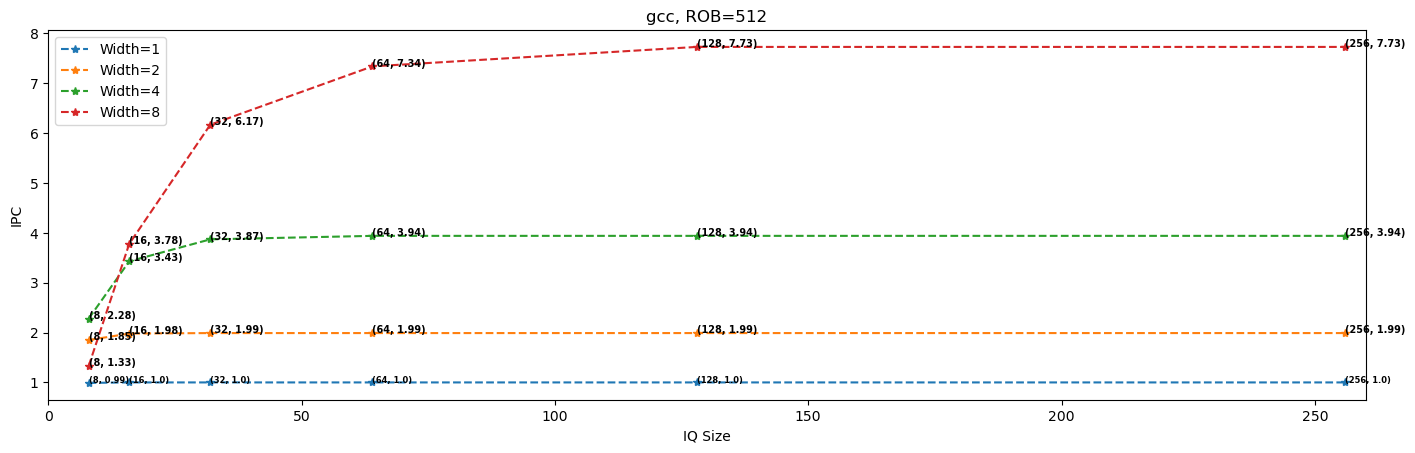

In [106]:
#plot gcc graph lines
f = plt.figure()
f.set_figwidth(17)
plt.plot(x, ygs[0], label="Width=1", linestyle='--', marker='*')
plt.plot(x, ygs[1], label="Width=2", linestyle='--', marker='*')
plt.plot(x, ygs[2], label="Width=4", linestyle='--', marker='*')
plt.plot(x, ygs[3], label="Width=8", linestyle='--', marker='*')
plt.xlim([0, 260])
plt.legend()
plt.xlabel("IQ Size")
plt.ylabel("IPC")
plt.title("gcc, ROB=512")

#label points
for i, j in zip(x, ygs[0]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=6)
for i, j in zip(x, ygs[1]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x, ygs[2]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x, ygs[3]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)

In [126]:
#find the 5% value of perl and gcc
print("perl")
for i in yps:
    print(i[5]-(.05*i[5]))

    
print("gcc")
for i in ygs:
    print(i[5]-(.05*i[5]))

        

perl
0.95
1.881
3.6955
7.172499999999999
gcc
0.95
1.8905
3.743
7.343500000000001


In [8]:
#table of values
perl=[6,17,36,83]
gcc=[5,9,24,65]

#second graph
for i in range(0, 4):
    for j in range (5, 10):
        os.system("./sim "+str(2**j)+" "+str(perl[i])+" "+str(2**i)+" val_trace_perl1 > out_" + str(2**j)+"_"+str(perl[i])+"_"+str(2**i)+"_perl.txt")
        os.system("./sim "+str(2**j)+" "+str(gcc[i])+" "+str(2**i)+" val_trace_gcc1 > out_" + str(2**j)+"_"+str(gcc[i])+"_"+str(2**i)+"_gcc.txt")

In [26]:
x2=[]
yps2=[[], [], [], []]
ygs2=[[], [], [], []]

for i in range(5, 10):
    x2.append(2**i)

#perl
for i in range (0, 4):
    for j in range(5, 10):
        out_fp=open("out_" + str(2**j)+"_"+str(perl[i])+"_"+str(2**i)+"_perl.txt") #open perl files
        for line in out_fp:
            if "IPC" in line:
                str_IPC=line.split("=")[-1]
                str_IPC=str_IPC.replace(" ", "")
                str_IPC=str_IPC.replace("\n", "")
                str_IPC=str_IPC.replace("\t", "")
                yps2[i].append(float(str_IPC))
                
                
#gcc
for i in range (0, 4):
    for j in range(5, 10):
        out_fg=open("out_" + str(2**j)+"_"+str(gcc[i])+"_"+str(2**i)+"_gcc.txt") #open gcc files
        for line in out_fg:
            if "IPC" in line:
                str_IPC=line.split("=")[-1]
                str_IPC=str_IPC.replace(" ", "")
                str_IPC=str_IPC.replace("\n", "")
                str_IPC=str_IPC.replace("\t", "")
                ygs2[i].append(float(str_IPC))


[5, 9, 24, 65]


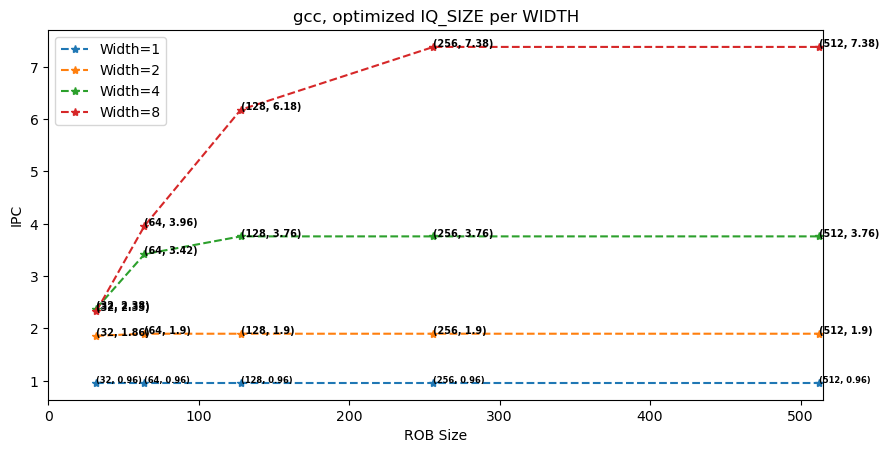

In [32]:
#plot gcc graph lines
f = plt.figure()
f.set_figwidth(10)
plt.plot(x2, ygs2[0], label="Width=1", linestyle='--', marker='*')
plt.plot(x2, ygs2[1], label="Width=2", linestyle='--', marker='*')
plt.plot(x2, ygs2[2], label="Width=4", linestyle='--', marker='*')
plt.plot(x2, ygs2[3], label="Width=8", linestyle='--', marker='*')
plt.xlim([0, 515])
plt.legend()
plt.xlabel("ROB Size")
plt.ylabel("IPC")
plt.title("gcc, optimized IQ_SIZE per WIDTH")

#label points
for i, j in zip(x2, ygs2[0]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=6)
for i, j in zip(x2, ygs2[1]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x2, ygs2[2]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x2, ygs2[3]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)

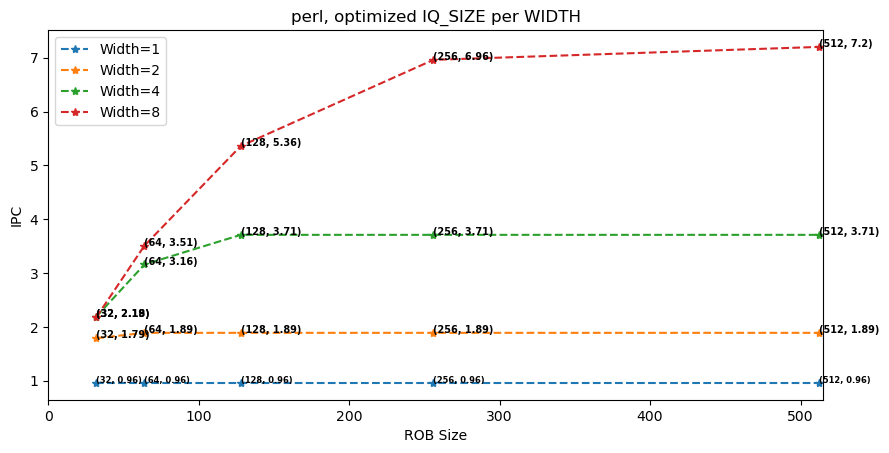

In [31]:
#plot perl graph lines
f = plt.figure()
f.set_figwidth(10)
plt.plot(x2, yps2[0], label="Width=1", linestyle='--', marker='*')
plt.plot(x2, yps2[1], label="Width=2", linestyle='--', marker='*')
plt.plot(x2, yps2[2], label="Width=4", linestyle='--', marker='*')
plt.plot(x2, yps2[3], label="Width=8", linestyle='--', marker='*')
plt.xlim([0, 515])
plt.legend()
plt.xlabel("ROB Size")
plt.ylabel("IPC")
plt.title("perl, optimized IQ_SIZE per WIDTH")

#label points
for i, j in zip(x2, yps2[0]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=6)
for i, j in zip(x2, yps2[1]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x2, yps2[2]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)
for i, j in zip(x2, yps2[3]):
   plt.text(i, j, '({}, {})'.format(i, j), weight="bold", fontsize=7)

5
5
5
5
5
9
9
9
9
9
24
24
24
24
24
65
65
65
65
65
